In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report


In [7]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('dark')

In [12]:
iris=datasets.load_iris()
X=scale(iris.data)
y=pd.DataFrame(iris.target)
var_name=iris.feature_names
X[:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [14]:
clustering=KMeans(n_clusters=3,random_state=5)
clustering.fit(X)c

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [19]:
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']
y.columns=['Target']
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


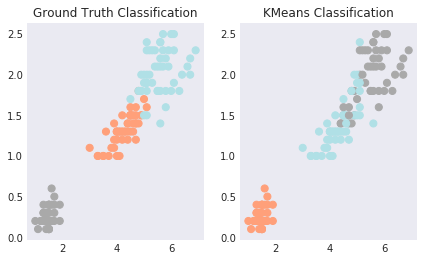

In [21]:
colortheme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=colortheme[iris.target],s=50)#maker_SIZE=50
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=colortheme[clustering.labels_],s=50)#maker_SIZE=50
plt.title("KMeans Classification")

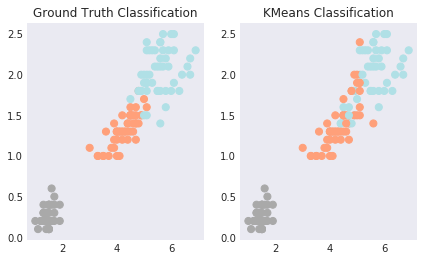

In [22]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
colortheme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=colortheme[iris.target],s=50)#maker_SIZE=50
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=colortheme[relabel],s=50)#maker_SIZE=50
plt.title("KMeans Classification")


In [23]:
print(classification_report(y,relabel)) #precision measures relvancy and recall measures completeness
#high precision +high recall =high accurate model resuts

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



# Hierarchical Methods

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering


In [25]:
np.set_printoptions(precision=4,suppress=True)

In [30]:
cars=pd.read_csv('mtcars.csv')
x=cars.iloc[:,[1,3,4]]
y=cars.am

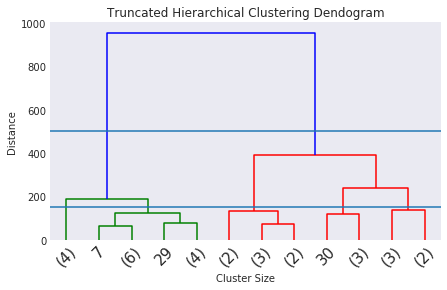

In [39]:
z=linkage(x,'ward')
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45.,leaf_font_size=15.)
plt.title('Truncated Hierarchical Clustering Dendogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [41]:
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [42]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.4375

In [43]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [45]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.71875

# K nears neighbour algorithm

In [47]:
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [48]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('whitegrid')

In [56]:
x_prime=cars.iloc[:,[1,3,4,6]]
y_tar=cars.iloc[:,9]

In [54]:
x_scaled=preprocessing.scale(x_prime)


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_tar,test_size=.20,random_state=17)

In [58]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
print clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [61]:
y_pred=clf.predict(x_test)
print sm.classification_report(y_test,y_pred)
#High precision + low Recall= Few results were returned but many of the label predictions returned were correct

             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       1.00      0.67      0.80         3

avg / total       0.89      0.86      0.85         7

